선형회귀
==
- 선형회귀 함수사용
- 경사하강법 동작 이해

## 선형회귀 함수 사용법

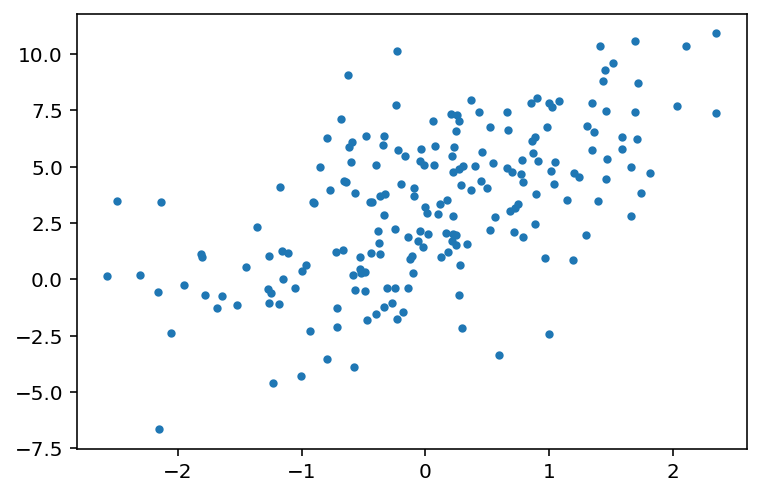

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

n_samples = 200
x = np.random.randn(n_samples)

# 계수 및 절편
w = 2
b = 3
# 노이지 추가
                  # 자신이 인지하고 있는 데이터로 시작을 하는 과정이 필요함!
y = w*x + b + np.random.randn(n_samples)*3
plt.scatter(x,y, s=10)

In [15]:
np.corrcoef(x,y) # 상관관계

array([[1.        , 0.59256662],
       [0.59256662, 1.        ]])

In [18]:
# 모델 생성(선택) -> 모델 학습(fit) -> 예측
# 파이썬이 제공하는 머신러닝 모델 중 선형 회귀 모델
from sklearn.linear_model import LinearRegression
model = LinearRegression()              # Constructor
model.fit(x.reshape(-1,1), y)           # Data 의 학습, Default = GD, MSE 사용
                                      # reshape(-1, 1)? : 1차원 벡터를 사용해서 2차원 구조로 만든것
                                      # 머신러닝 모델은 적어도 2차원이 필요함 --> 약속

print(model.coef_)                      # W
print(model.intercept_)                 # B

[1.96966205]
3.180063922134803


In [19]:
type(model)

sklearn.linear_model._base.LinearRegression

## 모델을 예측에 사용하기

In [20]:
model.predict([[1],[5],[10]])   # 예측기

array([ 5.14972597, 13.02837415, 22.87668439])

## 경사하강법 구현

변수가 1개인 경우
--

In [23]:
num_epoch = 10    # 얼마나 사용할건지
lr = 1.0          # learning rate 

# 초기 값은 랜덤하게 설정
w = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w*x + b   # y의 예측 값
    error = np.abs(y_pred - y).mean() # 예측값 - 실제값 (에러) 의 평균치
    print(f"{epoch:2} w = {w:.6f}, b = {b:.6f} , error = {error:.6f}")

    # GD
    w = w - lr*((y_pred - y)* x).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w = 0.510509, b = 0.437717 , error = 3.425436
 1 w = 2.129609, b = 3.257771 , error = 2.169915
 2 w = 1.964000, b = 3.171546 , error = 2.163144
 3 w = 1.970170, b = 3.180365 , error = 2.163251
 4 w = 1.969641, b = 3.180037 , error = 2.163246
 5 w = 1.969664, b = 3.180065 , error = 2.163246
 6 w = 1.969662, b = 3.180064 , error = 2.163246
 7 w = 1.969662, b = 3.180064 , error = 2.163246
 8 w = 1.969662, b = 3.180064 , error = 2.163246
 9 w = 1.969662, b = 3.180064 , error = 2.163246


변수가 2개인 경우
--

In [29]:
n_samples = 200
x1 = np.random.randn(n_samples)
x2 = np.random.randn(n_samples)

# Multi variate (2)
y = 2 * x1 + 3 * x2 + 4 + np.random.randn(n_samples)

model = LinearRegression()
X = pd.DataFrame({'x1':x1, 'x2':x2})
model.fit(X, y)

print(model.coef_)
print(model.intercept_)

[2.1487228  2.97966299]
4.0185026382280205


In [31]:
model.score(X,y)

0.935427296662616

경사하강법
--

In [38]:
num_epoch = 10
lr = 1

w1 = np.random.uniform()
w2 = np.random.uniform()
b = np.random.uniform()

for epoch in range(num_epoch):
    y_pred = w1*x1 + w2*x2 + b
    error = np.abs(y_pred - y).mean()
    print(f"{epoch:2} w1 = {w1:.6f},  w2 = {w2:.6f}, b = {b:.6f} , error = {error:.6f}")

    w1 = w1 - lr*((y_pred - y)* x1).mean()
    w2 = w2 - lr*((y_pred - y)* x2).mean()
    b = b - lr*((y_pred - y)).mean()

 0 w1 = 0.136551,  w2 = 0.681067, b = 0.956702 , error = 3.507065
 1 w1 = 2.494904,  w2 = 2.432749, b = 3.798889 , error = 0.926594
 2 w1 = 2.125911,  w2 = 2.901464, b = 3.939615 , error = 0.789407
 3 w1 = 2.154774,  w2 = 2.963573, b = 4.009558 , error = 0.790261
 4 w1 = 2.148577,  w2 = 2.977110, b = 4.016315 , error = 0.790295
 5 w1 = 2.148843,  w2 = 2.979178, b = 4.018191 , error = 0.790439
 6 w1 = 2.148726,  w2 = 2.979582, b = 4.018439 , error = 0.790452
 7 w1 = 2.148726,  w2 = 2.979648, b = 4.018492 , error = 0.790456
 8 w1 = 2.148723,  w2 = 2.979660, b = 4.018501 , error = 0.790456
 9 w1 = 2.148723,  w2 = 2.979663, b = 4.018502 , error = 0.790456
